In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [279]:
df= pd.read_csv(r"Credit.csv")

In [280]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [281]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [282]:
df.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [283]:
df.shape

(400, 12)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [285]:
df.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [286]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [287]:
df.duplicated().sum()

0

In [288]:
df = df.drop_duplicates()

In [289]:
df.duplicated().sum()

0

<Axes: ylabel='Income'>

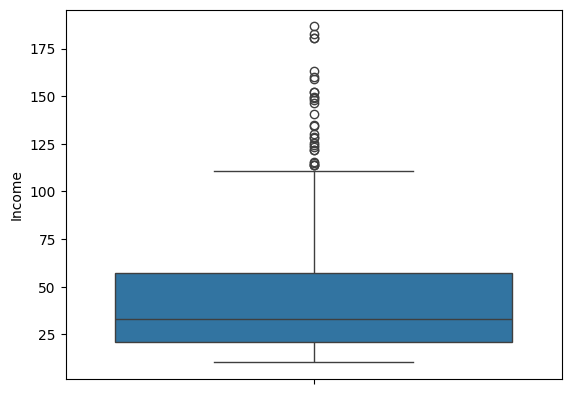

In [290]:
sns.boxplot(df.Income ) #for visualizing the distribution of outliers

<Axes: ylabel='Cards'>

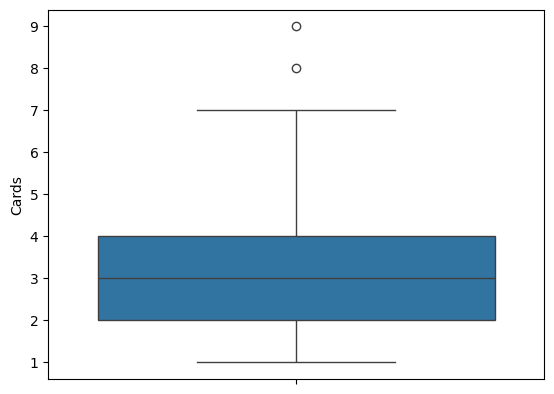

In [291]:
sns.boxplot(df.Cards)

In [292]:
for i in df.select_dtypes(include="object").columns:
     print(df[i].value_counts())
     print("***"*10)

Gender
Female    207
 Male     193
Name: count, dtype: int64
******************************
Student
No     360
Yes     40
Name: count, dtype: int64
******************************
Married
Yes    245
No     155
Name: count, dtype: int64
******************************
Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64
******************************


In [293]:
df.describe(include="object")

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


In [294]:
# Define the mapping from Ethnicity names to numbers
Ethnicity_map = {
    "Caucasian": 1, "Asian": 2, "African American ": 3
}
df['Ethnicity'] = df['Ethnicity'].map(Ethnicity_map)

In [295]:
x= LabelEncoder()

In [296]:
# Assuming you have a DataFrame called 'df' with columns to encode
encoder = LabelEncoder()

# Iterate over the columns to encode
for column in df.columns[-5:-2]:
    df[column] = encoder.fit_transform(df[column])


In [297]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,0,0,1,1.0,333
1,2,106.025,6645,483,3,82,15,1,1,1,2.0,903
2,3,104.593,7075,514,4,71,11,0,0,0,2.0,580
3,4,148.924,9504,681,3,36,11,1,0,0,2.0,964
4,5,55.882,4897,357,2,68,16,0,0,1,1.0,331


In [298]:
df.dropna(inplace=True)

In [299]:
scale = MinMaxScaler()

df['Income'] = scale.fit_transform(df[['Income']])
df['Limit'] = scale.fit_transform(df[['Limit']])
df['Rating'] = scale.fit_transform(df[['Rating']])
df['Cards'] = scale.fit_transform(df[['Cards']])
df['Age'] = scale.fit_transform(df[['Age']])
df['Education'] = scale.fit_transform(df[['Education']])
df['Ethnicity'] = scale.fit_transform(df[['Ethnicity']])
df['Balance'] = scale.fit_transform(df[['Balance']])


print(df.head())

   Unnamed: 0    Income     Limit    Rating  Cards       Age  Education  \
0           1  0.026321  0.208797  0.213723  0.125  0.146667   0.400000   
1           2  0.555020  0.442082  0.438695  0.250  0.786667   0.666667   
2           3  0.546712  0.475090  0.473566  0.375  0.640000   0.400000   
3           4  0.803892  0.661549  0.661417  0.250  0.173333   0.400000   
4           5  0.264123  0.307899  0.296963  0.125  0.600000   0.733333   

   Gender  Student  Married  Ethnicity   Balance  
0       0        0        1        0.0  0.166583  
1       1        1        1        1.0  0.451726  
2       0        0        0        1.0  0.290145  
3       1        0        0        1.0  0.482241  
4       0        0        1        0.0  0.165583  


In [300]:
df. to_csv("Cleaned_data.csv")